## Setup and Data Loading

In [45]:
# Import utilities and libraries
import sys
import os
import importlib

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


## Configuration

Configure the analysis parameters and algorithm folder to analyze.

In [46]:
# Configuration: Set the algorithm folder name here
# Change this to analyze different algorithm results (e.g., "greedy", "genetic", "simulated_annealing", etc.)
ALGORITHM_FOLDER = "local_search"

# Instances to analyze (can be modified as needed)
INSTANCES = ['TSPA', 'TSPB']

# Export settings
EXPORT_ENABLED = False
EXPORT_PLOTS = False
PLOT_FORMAT = 'png'  # Options: 'png', 'pdf', 'svg'
PLOT_DPI = 300

print(f"Configuration set:")
print(f"  Algorithm folder: {ALGORITHM_FOLDER}")
print(f"  Instances: {INSTANCES}")
print(f"  Export enabled: {EXPORT_ENABLED}")
print(f"  Plot format: {PLOT_FORMAT} (DPI: {PLOT_DPI})")

Configuration set:
  Algorithm folder: local_search
  Instances: ['TSPA', 'TSPB']
  Export enabled: False
  Plot format: png (DPI: 300)


In [47]:
# Load algorithm data using utility functions
algorithm_data = load_all_algorithm_results(ALGORITHM_FOLDER, INSTANCES)

if algorithm_data:
    print(f"\nSuccessfully loaded data for {len(algorithm_data)} instances")
    for instance_name, data in algorithm_data.items():
        df = data['df']
        print(f"{instance_name}: {len(df)} results")
else:
    print("No data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")
    print(f"Available algorithm folders: {get_available_algorithm_folders()}")
    for folder in get_available_algorithm_folders():
        instances = get_available_instances(folder)
        print(f"  {folder}: {instances}")

Loaded 1595 results for TSPA from local_search folder
Algorithms: ['GreedyLS_Edges_GreedyCycle', 'GreedyLS_Edges_Random', 'GreedyLS_Nodes_GreedyCycle', 'GreedyLS_Nodes_Random', 'SteepestLS_Edges_GreedyCycle', 'SteepestLS_Edges_Random', 'SteepestLS_Nodes_GreedyCycle', 'SteepestLS_Nodes_Random']
Loaded 1594 results for TSPB from local_search folder
Algorithms: ['GreedyLS_Edges_GreedyCycle', 'GreedyLS_Edges_Random', 'GreedyLS_Nodes_GreedyCycle', 'GreedyLS_Nodes_Random', 'SteepestLS_Edges_GreedyCycle', 'SteepestLS_Edges_Random', 'SteepestLS_Nodes_GreedyCycle', 'SteepestLS_Nodes_Random']

Successfully loaded data for 2 instances
TSPA: 1595 results
TSPB: 1594 results


## Visualization Data Exporter

This section provides functionality to export visualization data and results to files for use in other analysis tools.

In [48]:
# Create exporter instance using the utility class
exporter = VisualizationExporter(ALGORITHM_FOLDER)
print(f"Visualization exporter created for algorithm folder: {ALGORITHM_FOLDER}")
print(f"Output directory: {exporter.output_dir}")

Visualization exporter created for algorithm folder: local_search
Output directory: results\local_search


## Computational Experiment Results

## Export Results

Export the loaded algorithm results to various formats for further analysis and archival.

In [49]:
# Export all results using the visualization exporter
if algorithm_data and EXPORT_ENABLED:
    print("Exporting algorithm results...")
    
    # Export best solutions data
    exporter.export_best_solutions_data(algorithm_data, filename_suffix="_analysis")
    
    # Export statistical summaries
    exporter.export_statistics_summary(algorithm_data, filename_suffix="_analysis")
    
    # Export visualization plots (if enabled)
    if EXPORT_PLOTS:
        exporter.export_visualization_plots(algorithm_data, filename_suffix="_analysis", 
                                           save_format=PLOT_FORMAT, dpi=PLOT_DPI)
    
    print(f"\nAll exports completed! Files saved to: {exporter.output_dir}")
    print(f"Algorithm folder: {ALGORITHM_FOLDER}")
elif not EXPORT_ENABLED:
    print("Export is disabled. Set EXPORT_ENABLED = True to enable exporting.")
else:
    print("No algorithm data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")

Export is disabled. Set EXPORT_ENABLED = True to enable exporting.


In [50]:
# Display algorithm statistics using utility function
display_algorithm_statistics(algorithm_data)


INSTANCE: TSPA

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
SteepestLS_Edges_Random 200      71447.00   79087.00   73940.65   YES       
SteepestLS_Nodes_GreedyCycle 200      73195.00   83270.00   77086.57   YES       
GreedyLS_Nodes_GreedyCycle 200      73052.00   83577.00   77418.04   YES       
SteepestLS_Edges_GreedyCycle 200      70043.00   73908.00   71808.55   YES       
SteepestLS_Nodes_Random 200      80895.00   97487.00   88217.17   YES       
GreedyLS_Edges_Random 200      71015.00   76933.00   73774.88   YES       
GreedyLS_Nodes_Random 200      80038.00   94173.00   86278.68   YES       
GreedyLS_Edges_GreedyCycle 200      70783.00   76040.00   72845.96   YES       

INSTANCE: TSPB

Algorithm Performance:
--------------------------------------------------------

In [51]:
# Compare computation times across all algorithms
print("=== COMPUTATION TIME COMPARISON ===\n")

for instance_name, data in algorithm_data.items():
    df = data['df']
    print(f"Instance: {instance_name}")
    print("-" * 50)
    # Clean algorithm names by removing trailing numbers
    df['algorithm'] = df['algorithm'].str.replace(r'_start\d+$', '', regex=True)
    # Group by algorithm and calculate statistics for computation time
    time_stats = df.groupby('algorithm')['computation_time_ms'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    
    # Sort by mean computation time
    time_stats = time_stats.sort_values('mean')
    
    print(time_stats)
    print()

=== COMPUTATION TIME COMPARISON ===

Instance: TSPA
--------------------------------------------------
                              count    mean     std  min   max
algorithm                                                     
SteepestLS_Edges_GreedyCycle    200   31.77    2.48   27    38
SteepestLS_Nodes_GreedyCycle    200   34.58    4.16   25    53
SteepestLS_Nodes_Random         200   69.11    8.63   54   137
SteepestLS_Edges_Random         198   84.87  302.78   44  3264
GreedyLS_Nodes_GreedyCycle      199  100.22   51.73   65   806
GreedyLS_Edges_GreedyCycle      199  107.29   37.16   76   604
GreedyLS_Edges_Random           199  203.86   13.29  171   244
GreedyLS_Nodes_Random           200  207.38   17.97  161   259

Instance: TSPB
--------------------------------------------------
                              count    mean    std  min  max
algorithm                                                   
SteepestLS_Edges_GreedyCycle    200   35.50   2.91   28   50
SteepestLS_Nodes_

## 2D Visualization of Best Solutions


TSPA - BEST SOLUTIONS



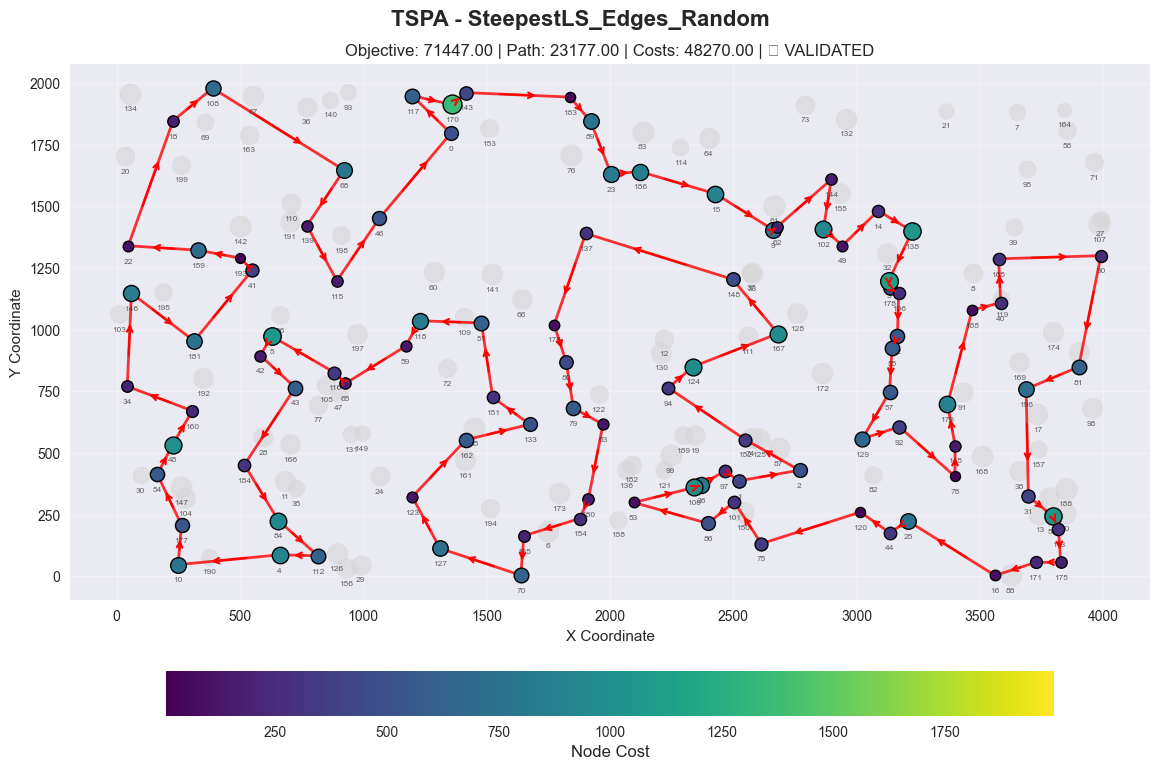


SteepestLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71447.00
Path Length: 23177.00
Node Costs: 48270.00
Selected Nodes: 100

Node Order (Route):
162, 133, 151, 51, 118, 59, 65, 116, 5, 42, 43, 184, 84, 112, 4, 10, 177, 54, 48, 160, 34, 146, 181, 41, 193, 159, 22, 18, 108, 68, 139, 115, 46, 0, 117, 170, 143, 183, 89, 23, 186, 15, 9, 62, 144, 102, 49, 14, 138, 3, 178, 106, 52, 55, 57, 129, 92, 78, 145, 179, 185, 40, 165, 90, 81, 196, 31, 56, 113, 175, 171, 16, 25, 44, 120, 75, 101, 86, 53, 100, 26, 97, 1, 2, 152, 94, 124, 167, 148, 137, 176, 80, 79, 63, 180, 154, 135, 70, 127, 123




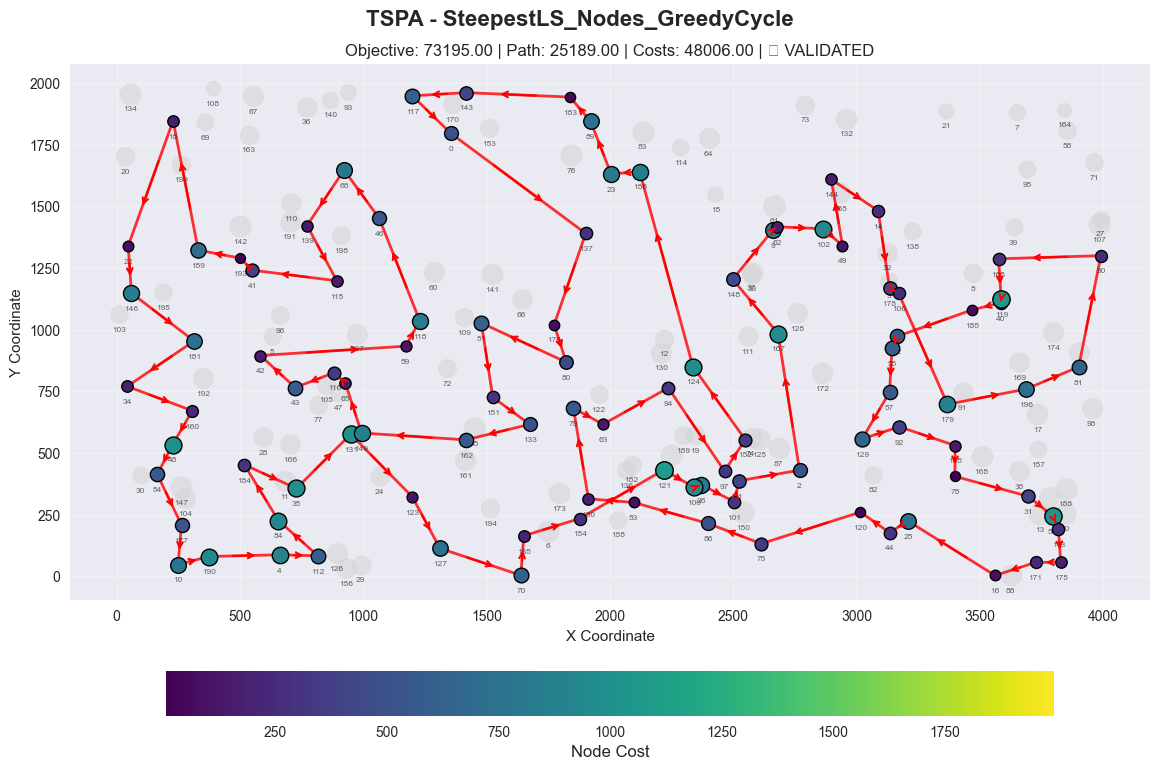


SteepestLS_Nodes_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 73195.00
Path Length: 25189.00
Node Costs: 48006.00
Selected Nodes: 100

Node Order (Route):
43, 42, 59, 118, 46, 68, 139, 115, 41, 193, 159, 18, 22, 146, 181, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 184, 35, 131, 123, 127, 70, 135, 154, 121, 100, 26, 101, 1, 2, 167, 148, 9, 62, 102, 49, 144, 14, 178, 106, 179, 196, 81, 90, 165, 119, 40, 185, 52, 55, 57, 129, 92, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 120, 75, 86, 53, 180, 79, 63, 94, 97, 152, 124, 186, 23, 89, 183, 143, 117, 0, 137, 176, 80, 51, 151, 133, 162, 149, 65, 116




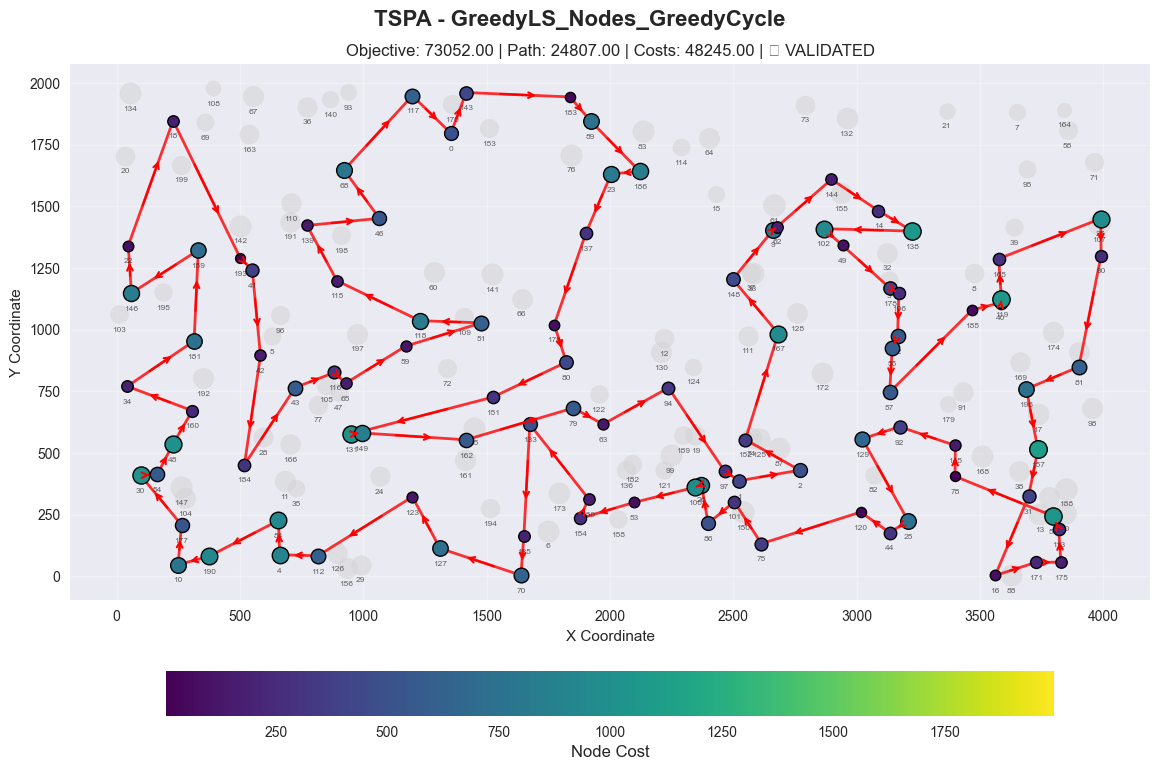


GreedyLS_Nodes_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 73052.00
Path Length: 24807.00
Node Costs: 48245.00
Selected Nodes: 100

Node Order (Route):
63, 94, 97, 1, 2, 152, 167, 148, 9, 62, 144, 14, 138, 102, 49, 178, 106, 52, 55, 57, 185, 40, 119, 165, 27, 90, 81, 196, 157, 31, 16, 171, 175, 113, 56, 78, 145, 92, 129, 25, 44, 120, 75, 101, 86, 26, 100, 53, 154, 180, 133, 135, 70, 127, 123, 112, 4, 84, 190, 10, 177, 30, 54, 48, 160, 34, 181, 159, 146, 22, 18, 193, 41, 42, 184, 43, 116, 65, 59, 51, 118, 115, 139, 46, 68, 117, 0, 143, 183, 89, 186, 23, 137, 176, 80, 151, 131, 149, 162, 79




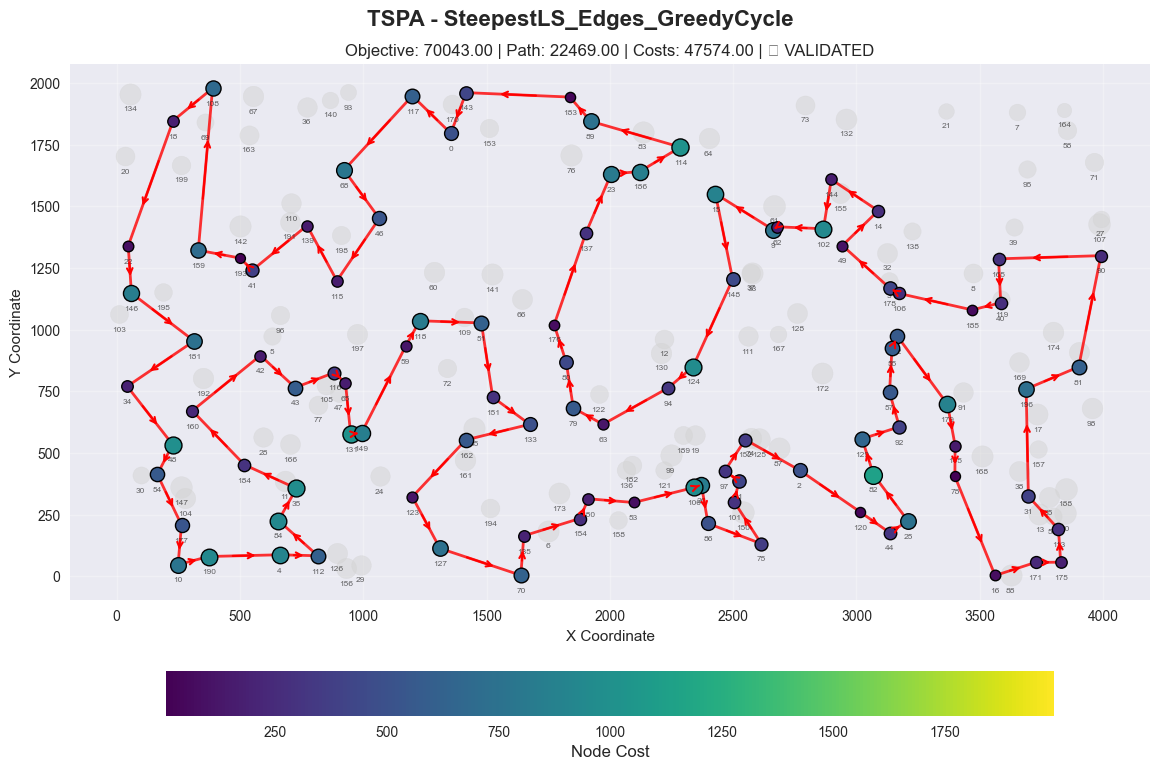


SteepestLS_Edges_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 70043.00
Path Length: 22469.00
Node Costs: 47574.00
Selected Nodes: 100

Node Order (Route):
102, 62, 9, 15, 148, 124, 94, 63, 79, 80, 176, 137, 23, 186, 114, 89, 183, 143, 0, 117, 68, 46, 115, 139, 41, 193, 159, 108, 18, 22, 146, 181, 34, 48, 54, 177, 10, 190, 4, 112, 84, 35, 184, 160, 42, 43, 116, 65, 131, 149, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 154, 180, 53, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 82, 129, 92, 57, 55, 52, 179, 145, 78, 16, 171, 175, 113, 31, 196, 81, 90, 165, 40, 185, 106, 178, 49, 14, 144




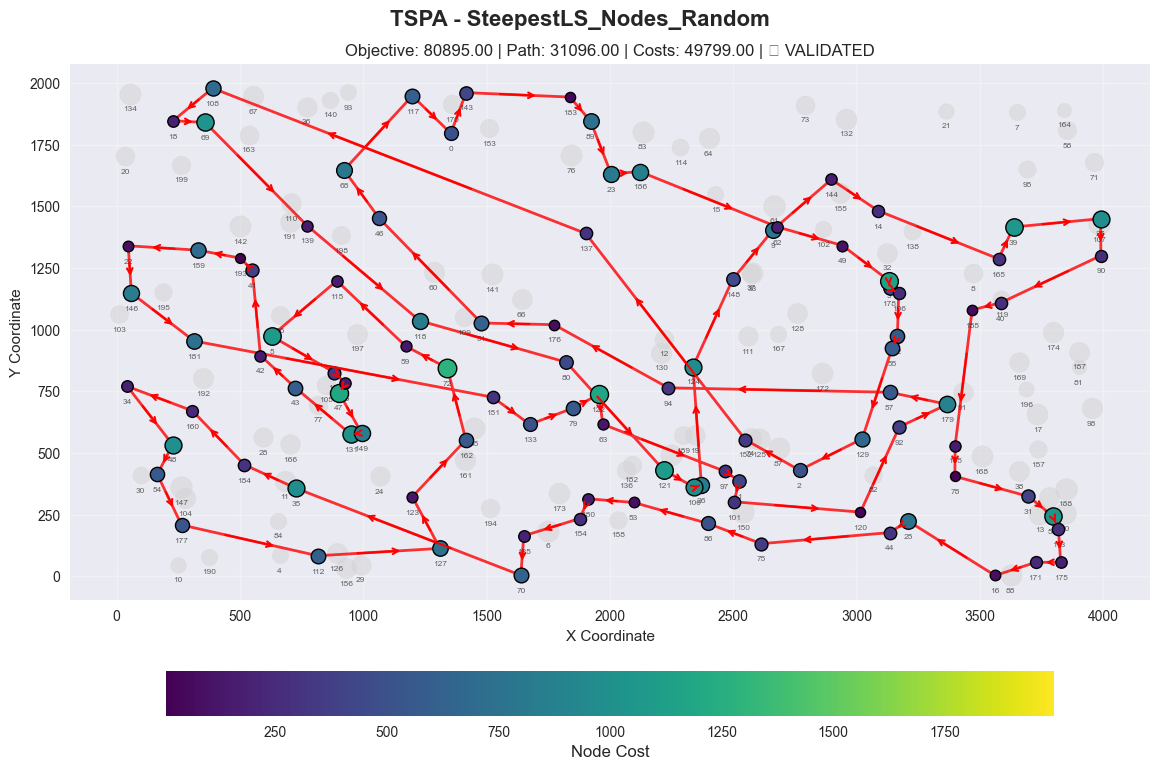


SteepestLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 80895.00
Path Length: 31096.00
Node Costs: 49799.00
Selected Nodes: 100

Node Order (Route):
16, 25, 44, 75, 86, 53, 180, 154, 135, 70, 35, 184, 160, 34, 48, 54, 177, 112, 127, 123, 162, 72, 59, 115, 5, 116, 65, 47, 149, 131, 43, 42, 41, 193, 159, 22, 146, 181, 151, 133, 79, 122, 63, 97, 1, 101, 120, 92, 179, 57, 94, 176, 51, 46, 68, 117, 0, 143, 183, 89, 23, 186, 62, 49, 3, 178, 106, 52, 55, 129, 2, 152, 137, 108, 18, 69, 139, 118, 80, 121, 100, 26, 124, 148, 9, 144, 14, 165, 39, 27, 90, 40, 185, 145, 78, 31, 56, 113, 175, 171




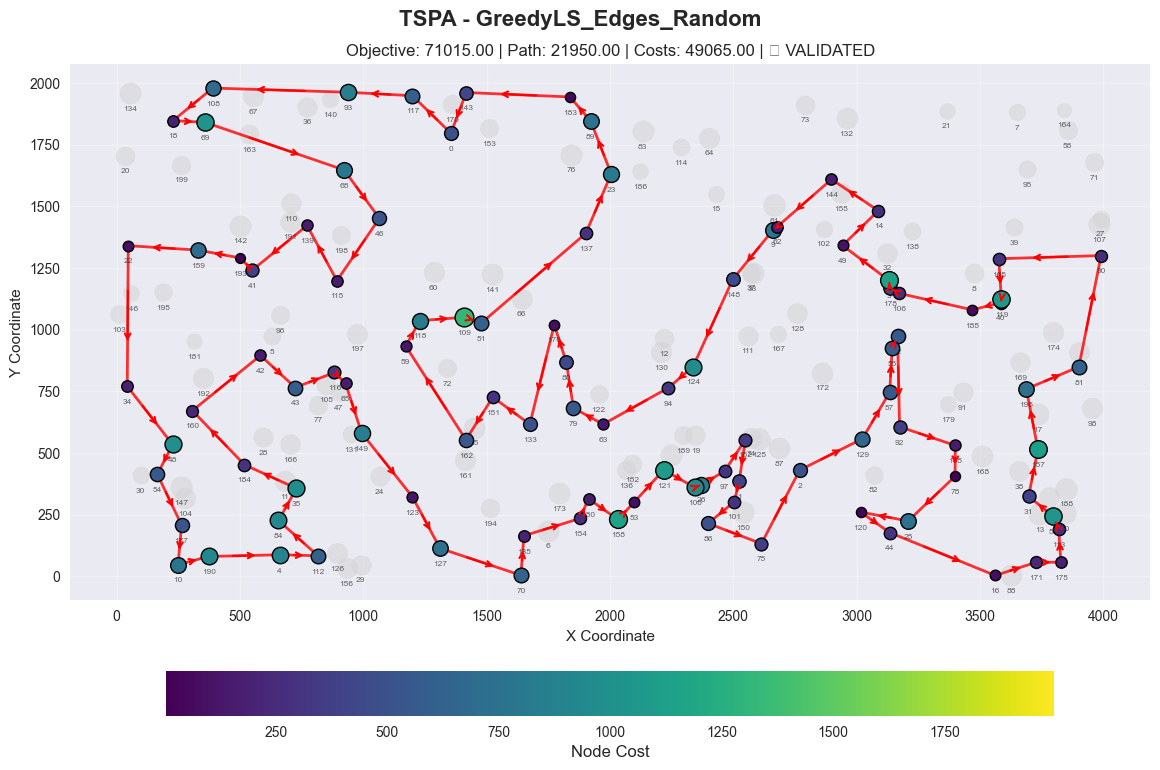


GreedyLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71015.00
Path Length: 21950.00
Node Costs: 49065.00
Selected Nodes: 100

Node Order (Route):
113, 56, 31, 157, 196, 81, 90, 165, 119, 40, 185, 106, 178, 3, 49, 14, 144, 62, 9, 148, 124, 94, 63, 79, 80, 176, 133, 151, 162, 59, 118, 109, 51, 137, 23, 89, 183, 143, 0, 117, 93, 108, 18, 69, 68, 46, 115, 139, 41, 193, 159, 22, 34, 48, 54, 177, 10, 190, 4, 112, 84, 35, 184, 160, 42, 43, 116, 65, 149, 123, 127, 70, 135, 154, 180, 158, 53, 121, 100, 26, 97, 152, 1, 101, 86, 75, 2, 129, 57, 55, 52, 92, 145, 78, 25, 120, 44, 16, 171, 175




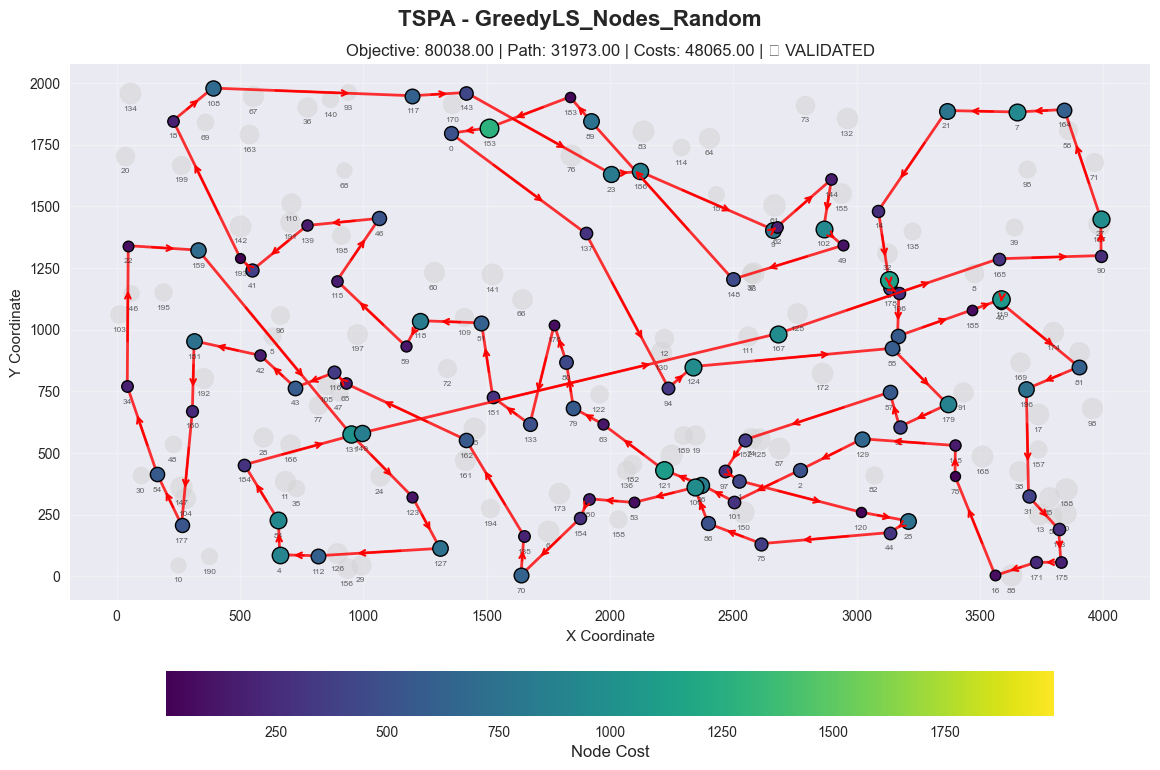


GreedyLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 80038.00
Path Length: 31973.00
Node Costs: 48065.00
Selected Nodes: 100

Node Order (Route):
154, 70, 135, 162, 65, 116, 43, 42, 181, 160, 177, 54, 34, 22, 159, 131, 123, 127, 112, 4, 84, 184, 149, 167, 165, 90, 27, 164, 7, 21, 14, 3, 178, 106, 52, 185, 119, 40, 81, 196, 31, 113, 175, 171, 16, 78, 145, 129, 2, 101, 26, 121, 63, 79, 80, 176, 133, 151, 51, 118, 59, 115, 46, 139, 41, 193, 18, 108, 117, 143, 23, 186, 9, 62, 144, 102, 49, 148, 89, 183, 153, 0, 137, 94, 124, 55, 179, 92, 57, 152, 97, 1, 120, 25, 44, 75, 86, 100, 53, 180




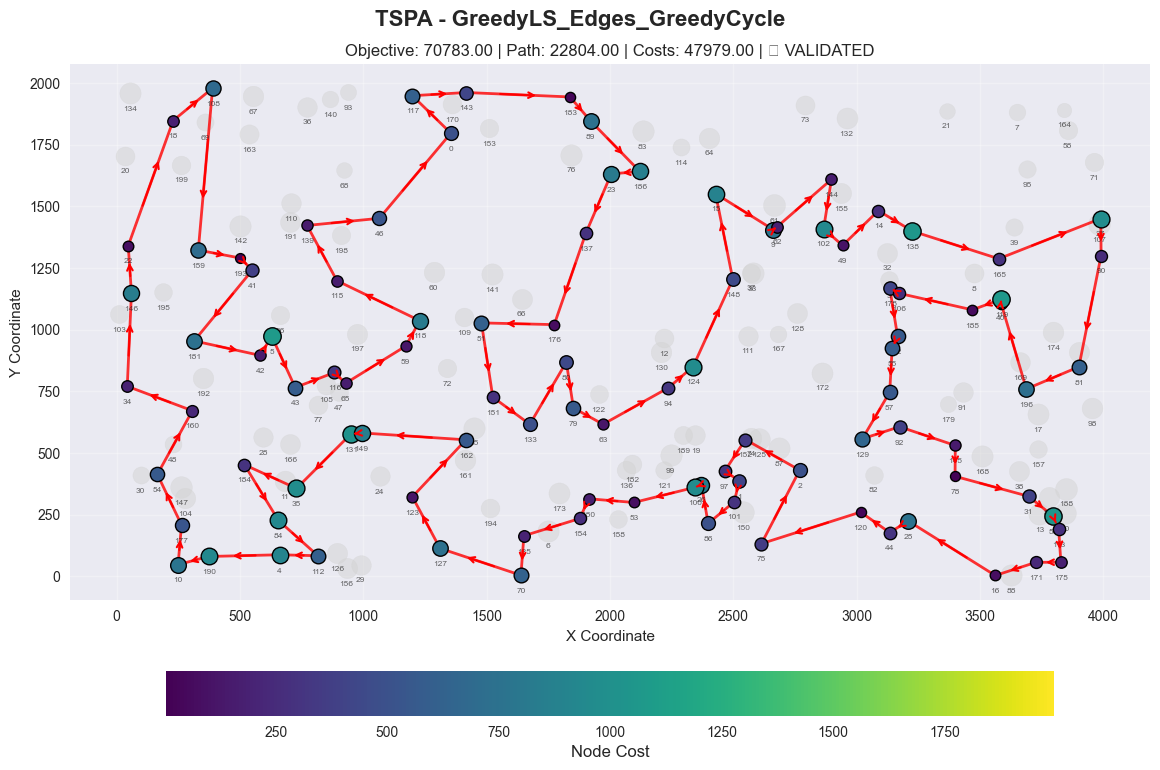


GreedyLS_Edges_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 70783.00
Path Length: 22804.00
Node Costs: 47979.00
Selected Nodes: 100

Node Order (Route):
115, 139, 46, 0, 117, 143, 183, 89, 186, 23, 137, 176, 51, 151, 133, 80, 79, 63, 94, 124, 148, 15, 9, 62, 144, 102, 49, 14, 138, 165, 27, 90, 81, 196, 40, 119, 185, 106, 178, 52, 55, 57, 129, 92, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 120, 75, 2, 152, 97, 1, 101, 86, 26, 100, 53, 180, 154, 135, 70, 127, 123, 162, 149, 131, 35, 184, 84, 112, 4, 190, 10, 177, 54, 160, 34, 146, 22, 18, 108, 159, 193, 41, 181, 42, 5, 43, 116, 65, 59, 118



TSPB - BEST SOLUTIONS



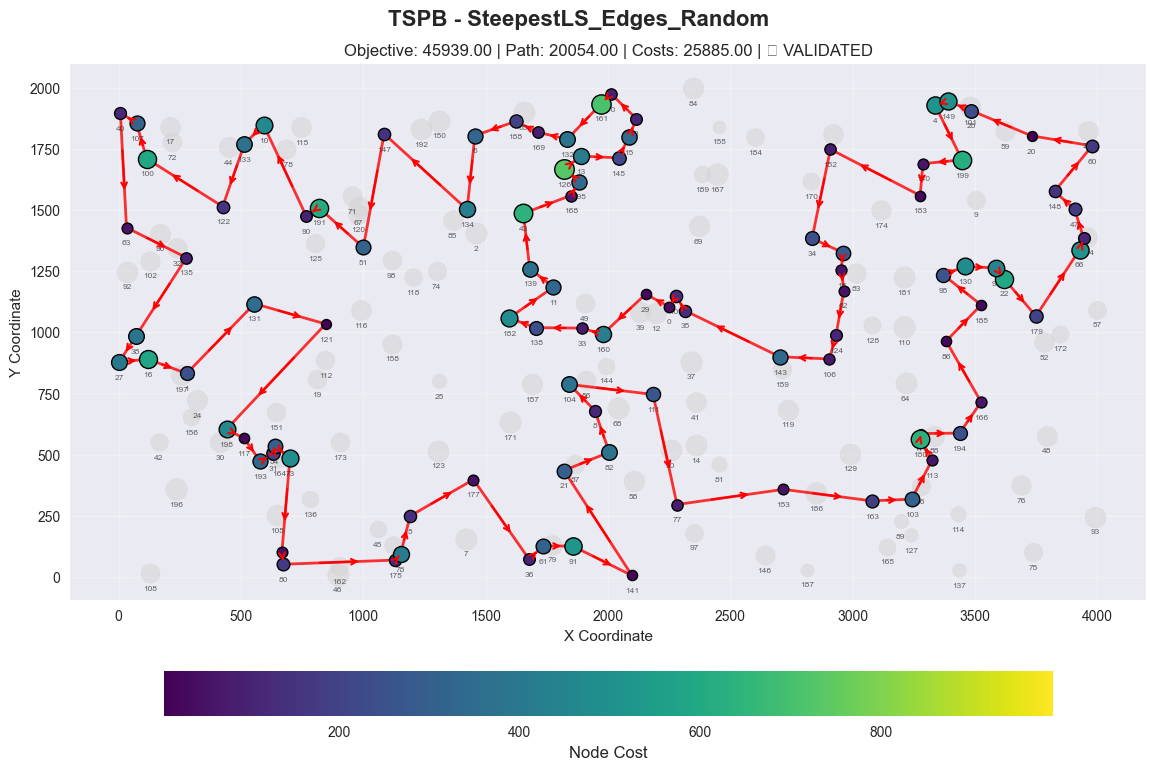


SteepestLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 45939.00
Path Length: 20054.00
Node Costs: 25885.00
Selected Nodes: 100

Node Order (Route):
122, 100, 107, 40, 63, 135, 38, 27, 16, 1, 131, 121, 198, 117, 193, 31, 54, 73, 190, 80, 175, 78, 5, 177, 36, 61, 91, 141, 21, 82, 8, 104, 111, 77, 153, 163, 103, 113, 180, 176, 194, 166, 86, 185, 95, 130, 99, 22, 179, 66, 94, 47, 148, 60, 20, 28, 149, 4, 199, 140, 183, 152, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 160, 33, 138, 182, 11, 139, 43, 168, 195, 126, 13, 145, 15, 3, 70, 161, 132, 169, 188, 6, 134, 147, 51, 191, 90, 10, 133




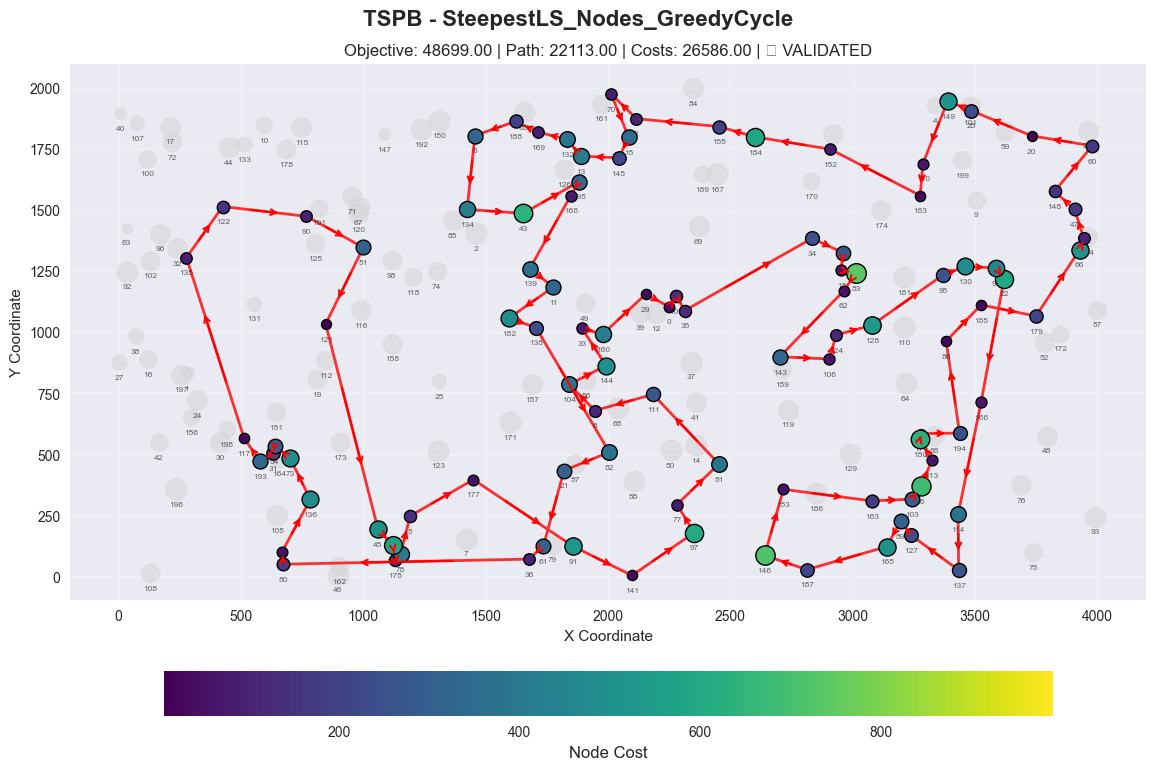


SteepestLS_Nodes_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 48699.00
Path Length: 22113.00
Node Costs: 26586.00
Selected Nodes: 100

Node Order (Route):
47, 148, 60, 20, 28, 149, 140, 183, 152, 184, 155, 3, 70, 15, 145, 13, 132, 169, 188, 6, 134, 43, 195, 168, 139, 11, 182, 138, 82, 21, 61, 36, 80, 190, 136, 73, 54, 31, 193, 117, 135, 122, 90, 51, 121, 45, 142, 175, 78, 5, 177, 91, 141, 97, 77, 81, 111, 8, 104, 144, 33, 160, 29, 0, 109, 35, 34, 55, 18, 83, 62, 143, 106, 124, 128, 95, 130, 99, 22, 166, 114, 137, 127, 89, 165, 187, 146, 153, 163, 103, 26, 113, 180, 176, 194, 86, 185, 179, 66, 94




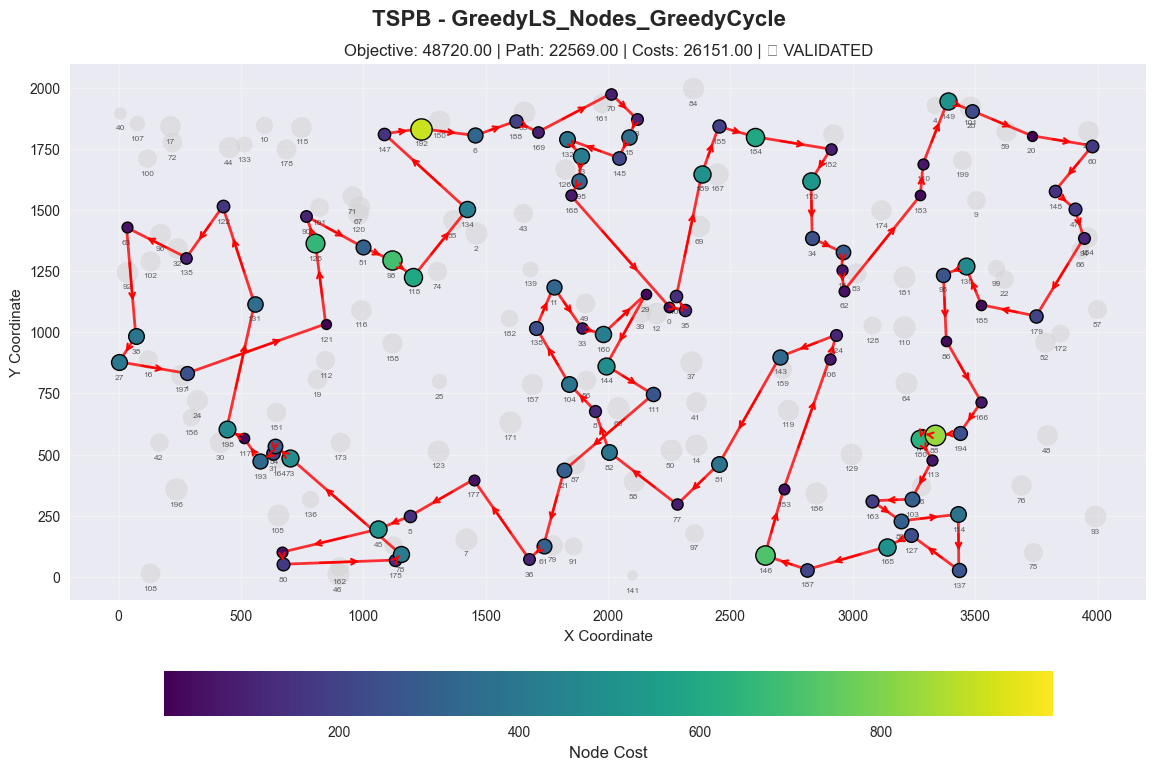


GreedyLS_Nodes_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 48720.00
Path Length: 22569.00
Node Costs: 26151.00
Selected Nodes: 100

Node Order (Route):
184, 152, 170, 34, 55, 18, 62, 183, 140, 149, 28, 20, 60, 148, 47, 94, 179, 185, 130, 95, 86, 166, 194, 88, 176, 180, 113, 103, 163, 89, 114, 137, 127, 165, 187, 146, 153, 106, 124, 143, 81, 77, 82, 8, 104, 138, 11, 33, 160, 29, 144, 111, 21, 61, 36, 177, 5, 45, 190, 80, 175, 78, 73, 54, 31, 193, 117, 198, 131, 122, 135, 63, 38, 27, 1, 121, 125, 90, 51, 98, 118, 134, 147, 192, 6, 188, 169, 70, 3, 15, 145, 132, 13, 195, 168, 0, 35, 109, 189, 155




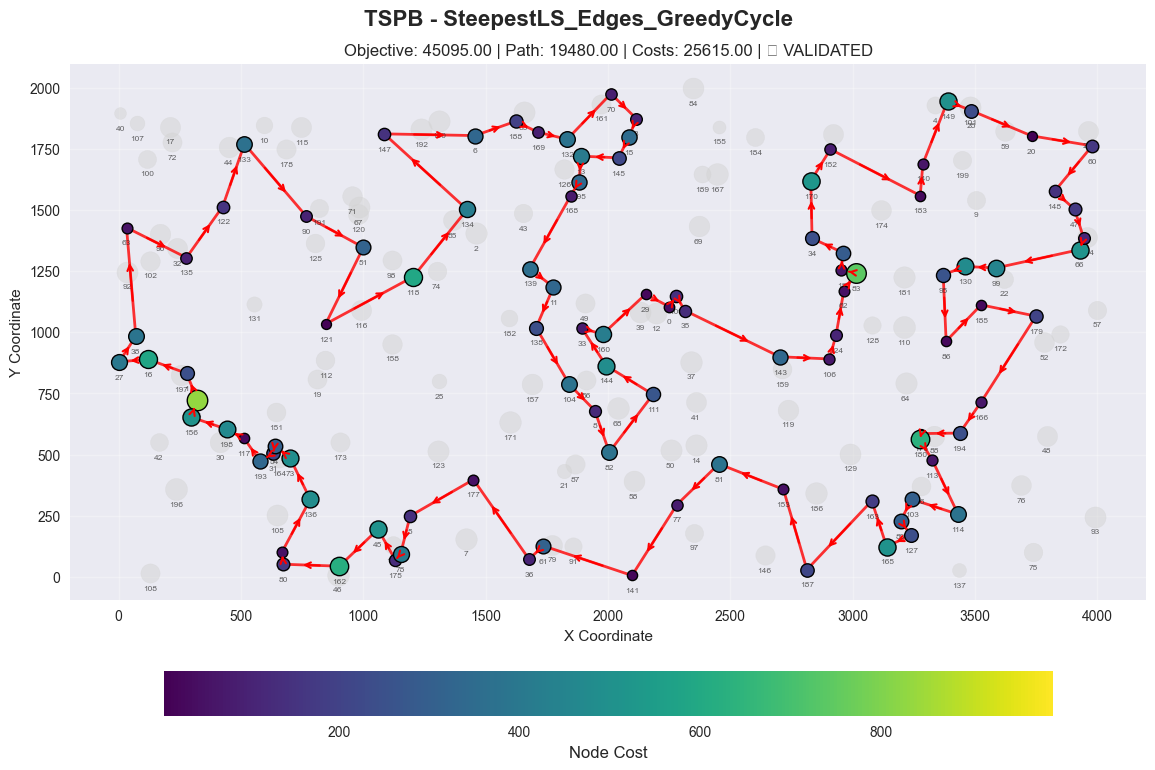


SteepestLS_Edges_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 45095.00
Path Length: 19480.00
Node Costs: 25615.00
Selected Nodes: 100

Node Order (Route):
190, 136, 73, 54, 31, 193, 117, 198, 156, 24, 1, 16, 27, 38, 63, 135, 122, 133, 90, 51, 121, 118, 134, 147, 6, 188, 169, 132, 70, 3, 15, 145, 13, 195, 168, 139, 11, 138, 104, 8, 82, 111, 144, 33, 160, 29, 0, 109, 35, 143, 106, 124, 62, 83, 18, 55, 34, 170, 152, 183, 140, 149, 28, 20, 60, 148, 47, 94, 66, 99, 130, 95, 86, 185, 179, 166, 194, 176, 180, 113, 114, 103, 89, 127, 165, 163, 187, 153, 81, 77, 141, 61, 36, 177, 5, 78, 175, 45, 162, 80




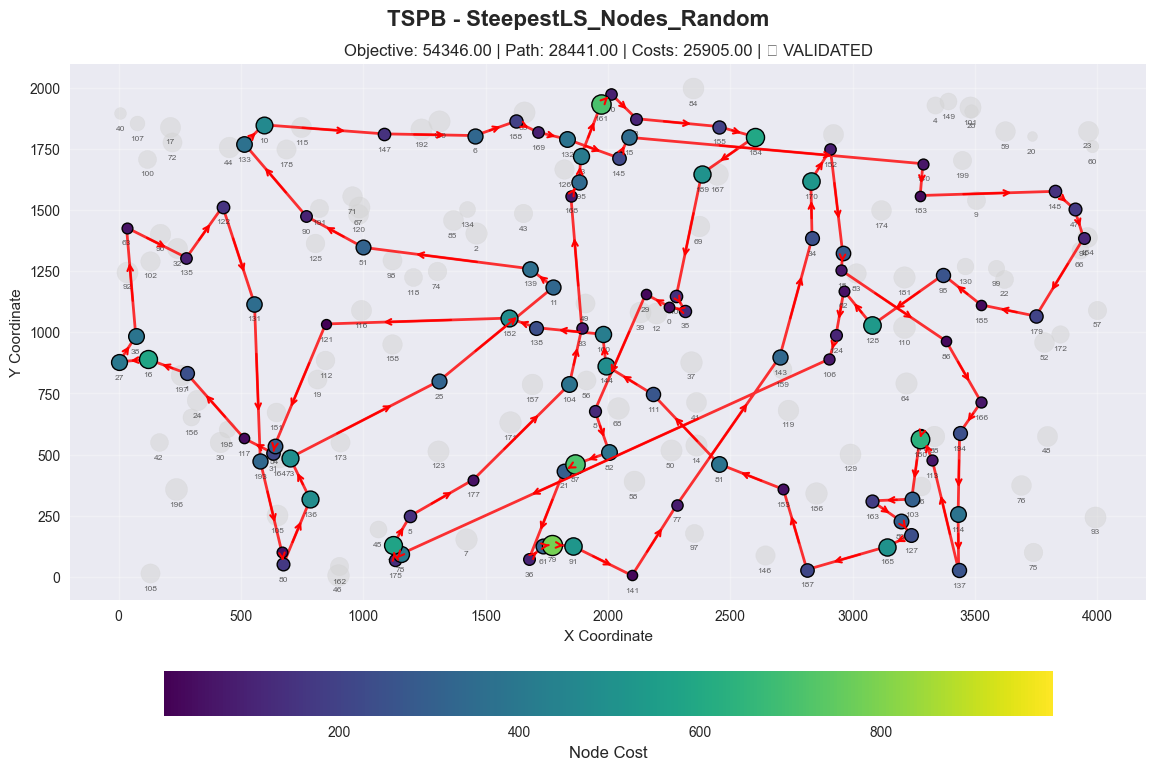


SteepestLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 54346.00
Path Length: 28441.00
Node Costs: 25905.00
Selected Nodes: 100

Node Order (Route):
124, 106, 78, 175, 142, 5, 177, 104, 33, 168, 195, 13, 161, 70, 3, 155, 184, 189, 109, 35, 0, 29, 8, 82, 87, 21, 36, 61, 79, 91, 141, 77, 143, 34, 170, 152, 55, 18, 86, 166, 194, 114, 137, 113, 176, 180, 103, 163, 89, 127, 165, 187, 153, 81, 111, 144, 160, 138, 182, 121, 54, 31, 117, 1, 16, 27, 38, 63, 135, 122, 131, 193, 190, 80, 136, 73, 25, 11, 139, 51, 90, 133, 10, 147, 6, 188, 169, 132, 145, 15, 140, 183, 148, 47, 94, 179, 185, 95, 128, 62




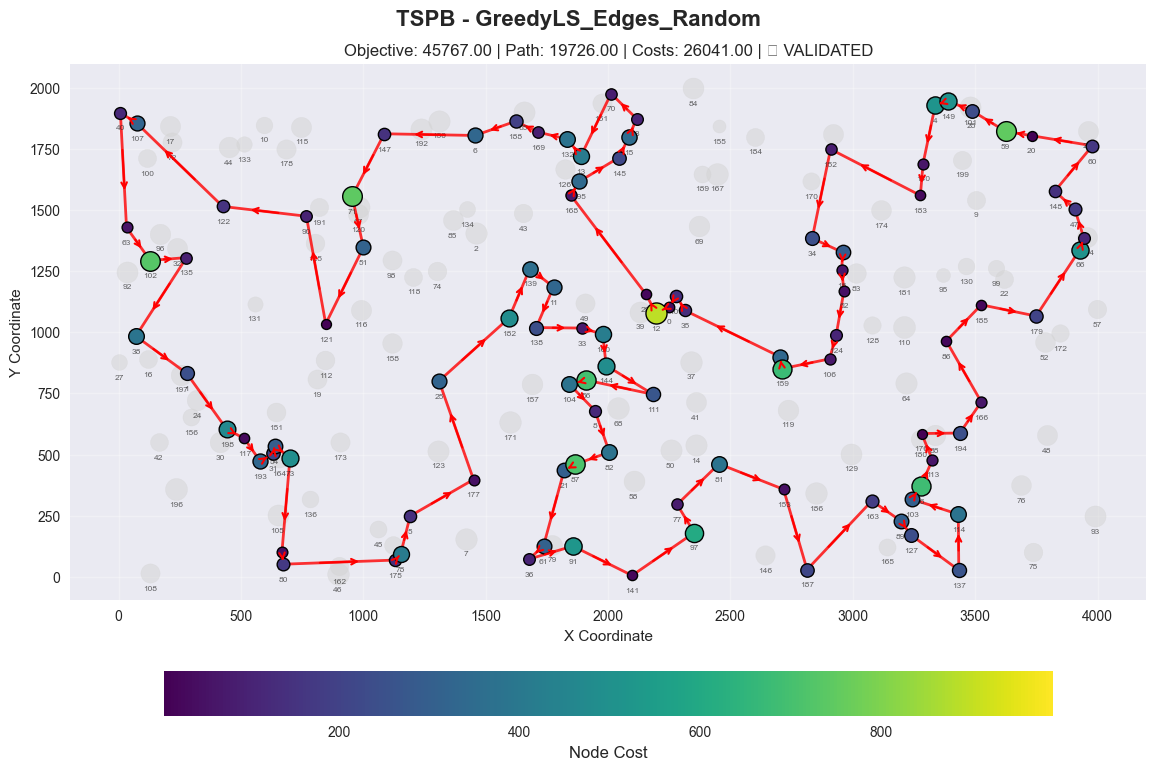


GreedyLS_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 45767.00
Path Length: 19726.00
Node Costs: 26041.00
Selected Nodes: 100

Node Order (Route):
179, 66, 94, 47, 148, 60, 20, 59, 28, 149, 4, 140, 183, 152, 34, 55, 18, 62, 124, 106, 159, 143, 35, 109, 0, 12, 29, 168, 195, 145, 15, 3, 70, 13, 132, 169, 188, 6, 147, 71, 51, 121, 90, 122, 107, 40, 63, 102, 135, 38, 1, 198, 117, 193, 31, 54, 73, 190, 80, 175, 78, 5, 177, 25, 182, 139, 11, 138, 33, 160, 144, 111, 56, 104, 8, 82, 87, 21, 61, 36, 91, 141, 97, 77, 81, 153, 187, 163, 89, 127, 137, 114, 103, 26, 113, 176, 194, 166, 86, 185




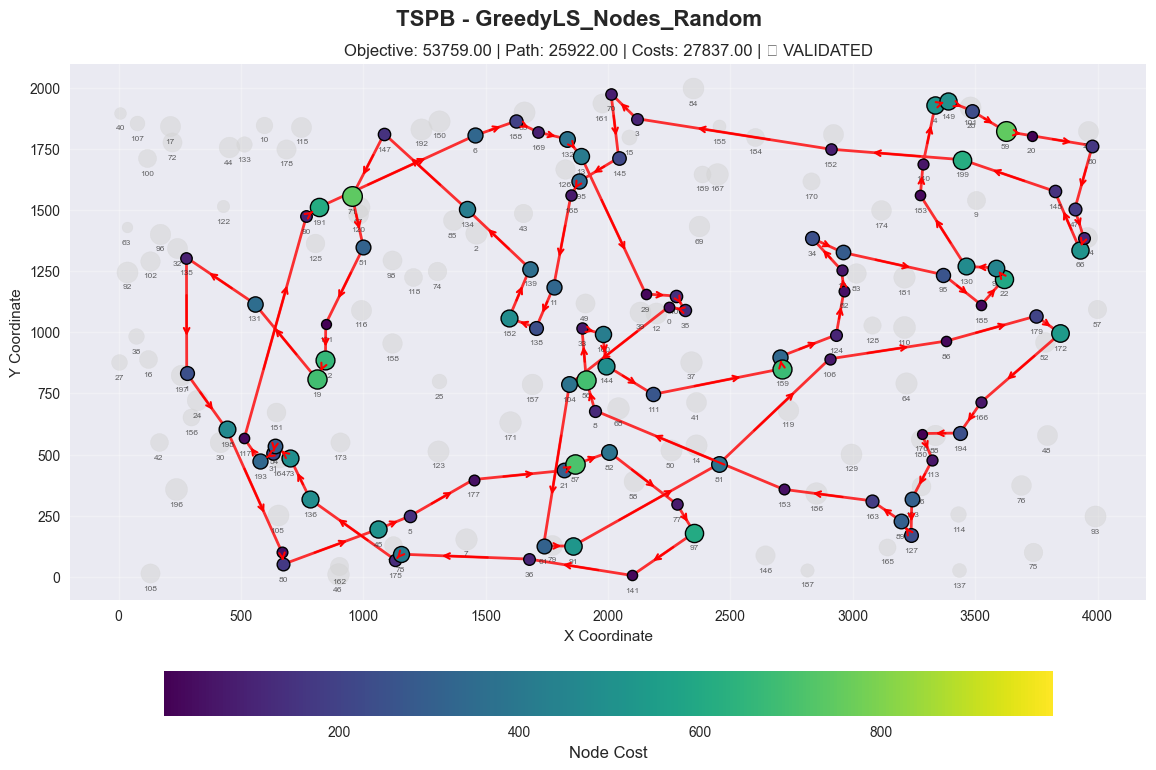


GreedyLS_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 53759.00
Path Length: 25922.00
Node Costs: 27837.00
Selected Nodes: 100

Node Order (Route):
62, 18, 34, 55, 95, 185, 22, 99, 130, 183, 140, 4, 149, 28, 59, 20, 60, 47, 94, 66, 148, 199, 152, 3, 70, 145, 195, 168, 11, 138, 182, 139, 134, 147, 71, 51, 121, 112, 19, 131, 135, 1, 198, 190, 80, 45, 5, 177, 21, 87, 82, 77, 97, 141, 36, 78, 175, 136, 73, 54, 31, 193, 117, 90, 191, 6, 188, 169, 132, 13, 29, 109, 35, 0, 104, 61, 91, 81, 106, 86, 179, 172, 166, 194, 176, 113, 103, 127, 89, 163, 153, 8, 56, 33, 160, 144, 111, 159, 143, 124




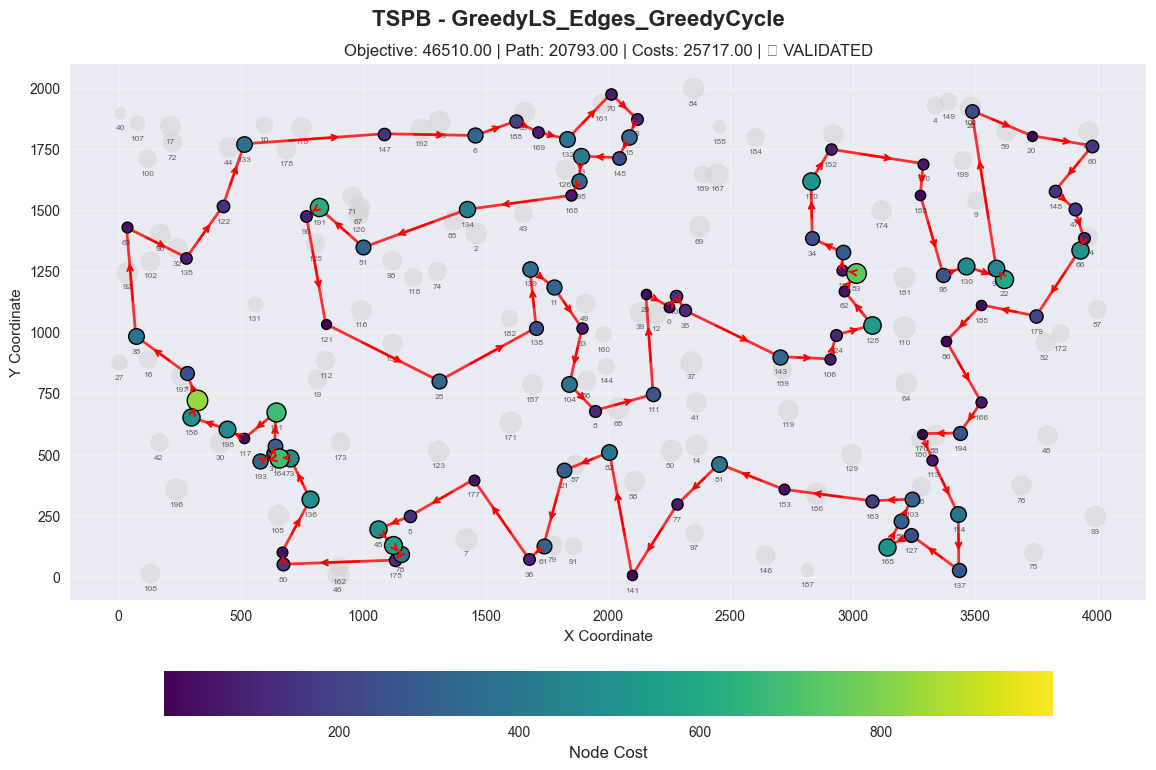


GreedyLS_Edges_GreedyCycle
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 46510.00
Path Length: 20793.00
Node Costs: 25717.00
Selected Nodes: 100

Node Order (Route):
54, 151, 117, 198, 156, 24, 1, 38, 63, 135, 122, 133, 147, 6, 188, 169, 132, 70, 3, 15, 145, 13, 195, 168, 134, 51, 191, 90, 121, 25, 138, 139, 11, 33, 104, 8, 111, 29, 0, 109, 35, 143, 106, 124, 128, 62, 83, 18, 55, 34, 170, 152, 140, 183, 95, 130, 22, 99, 28, 20, 60, 148, 47, 94, 66, 179, 185, 86, 166, 194, 176, 113, 114, 137, 127, 165, 89, 103, 163, 153, 81, 77, 141, 82, 21, 61, 36, 177, 5, 45, 142, 78, 175, 80, 190, 136, 73, 164, 193, 31




In [52]:
# Plot best solutions using utility function
plot_best_solutions(algorithm_data)

## Algorithm Performance Comparison

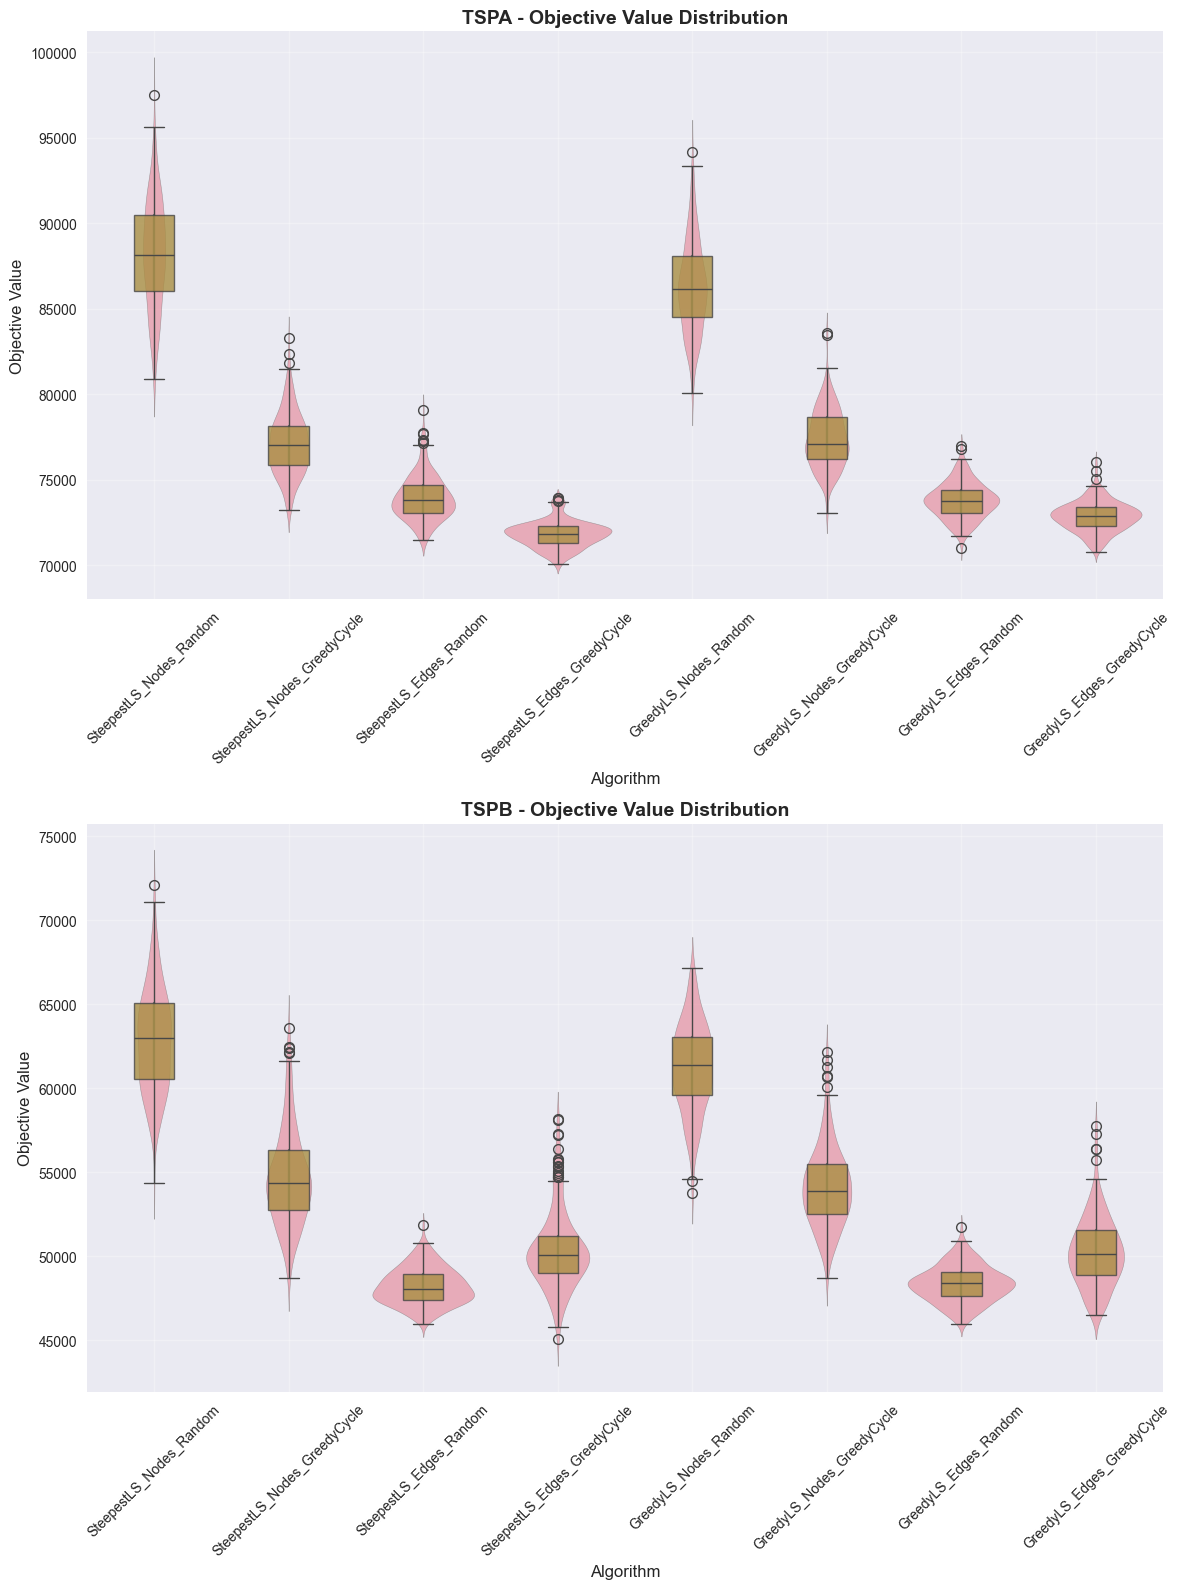

In [53]:
# Performance comparison plots using utility functions
plot_objective_distributions(algorithm_data)